<a href="https://colab.research.google.com/github/yogialvin969/machine/blob/main/UTS2_G231210002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #mengimpor pustaka Pandas dan memberikan alias "pd" untuk memudahkan penggunaan.
import numpy as np #Baris ini mengimpor pustaka NumPy dan memberikan alias "np". NumPy adalah pustaka yang menyediakan dukungan untuk array dan operasi matematika di Python
data=pd.read_csv('CarPrice_Assignment.csv') #Baris ini membaca data dari file CSV dengan menggunakan fungsi read_csv dari Pandas

In [2]:
data.head() #untuk menampilkan beberapa baris pertama dari DataFrame data.

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data=pd.get_dummies(data) #untuk mengubah variabel kategorikal dalam DataFrame data menjadi variabel dummy atau one-hot encoded

In [4]:
data=data.dropna() # menghapus baris yang mengandung nilai-nilai yang hilang (NaN) dari DataFrame data.

In [5]:
y=data['price'] #membuat variabel baru yang disebut y dan mengisinya dengan kolom 'price' dari DataFrame data

In [6]:
print(data.shape) #mencetak bentuk (shape) dari DataFrame data
print(y.shape) #mencetak bentuk (shape) dari variabel y

(205, 201)
(205,)


In [7]:
data.drop(['price'], axis=1) # untuk menghapus kolom 'price'

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split #membagi data menjadi set pelatihan dan set pengujian
x_train, x_test, y_train, y_test = train_test_split(data,y,shuffle=True) #Parameter shuffle=True menunjukkan bahwa data akan diacak sebelum dibagi, sehingga memastikan distribusi kelas yang seimbang di kedua set (pelatihan dan pengujian)

In [9]:
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor #mengimpor kelas DecisionTreeRegressor dari pustaka Scikit-Learn.
regr=DecisionTreeRegressor(max_depth=4) #membuat objek DecisionTreeRegressor dengan menetapkan parameter max_depth ke 4
regr.fit(x_train,y_train) #melatih model Decision Tree Regressor menggunakan data pelatihan x_train dan label pelatihan y_train
y_pred_dectree=regr.predict(x_test) #membuat prediksi menggunakan model yang telah dilatih pada data pengujian x_test.

Decision Tree
MAE 651.7282110643338
RMSE 926.6529981736901


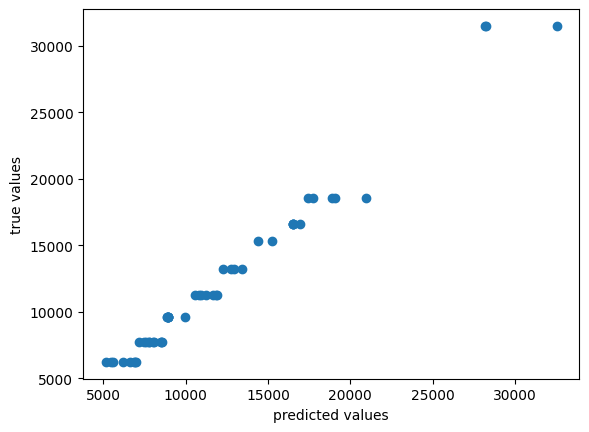

In [11]:
#mencetak judul "Decision Tree" dan kemudian memanggil fungsi accuracy untuk mengevaluasi kinerja model Decision Tree Regressor.
print("Decision Tree")
accuracy(y_pred_dectree,y_test)